In [1]:
#importing all necessary libraries 
import pandas as pd
import numpy as np
import yfinance as yf
import random
import matplotlib.pyplot as plt

#random portfolios/clusters from previous post that we will draw random stocks from
cluster_one =  ['TSLA', 'AMD', 'PHM', 'MHK', 'QCOM']
cluster_two = ['VMC', 'HII', 'BWA', 'PNW', 'EQR']
cluster_three = ['LVS', 'SNPS', 'CINF', 'NTAP', 'HPE']
cluster_four = ['JNJ', 'INCY', 'PG', 'GILD', 'SJM']

In [2]:
#creating a random portfolio 
portfolio = random.sample(cluster_one, 1) + random.sample(cluster_two, 1) + random.sample(cluster_three, 1) + random.sample(cluster_four, 1)

column_names = ['TSLA', 'VMC', 'SNPS', 'SJM']

#downloading data for each stock in the portfolio
frames = []
for i in portfolio:
  frame = yf.download(i, start = '2020-01-01', end = '2022-12-31')['Close'].to_frame()
  frames.append(frame)

#naming columns using 'column_names'
for i in range(len(frames)):
    frame = frames[i]
    frame = frame.rename(columns={frame.columns[0]: column_names[i]})
    frames[i] = frame


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#concatenating dataframes together 
df = pd.concat(frames, axis=1)

#normalizing the Close prices for each stock by dividing each column by its first value
first_values = df.iloc[0]

df = df.apply(lambda col: col / first_values[col.name])

#assigning weights, each stock 25% 

df = df * .25

#setting an initial investment amount which is $10,000 and;
#multiply the dataframe by the investment amount 

investment = 10000

df = df * investment

#Summing up all columns of df to form a new column, 'Portfolio Value'. 

df['Portfolio Value'] = df.sum(axis=1)


In [4]:
#adding the 'Daily Profit' column, which calculates changes in profit day by day 

df['Daily Profit $'] = df['Portfolio Value'].diff()

#calculating stats on the 'Portfolio Value' column 

stats = df['Portfolio Value'].describe().to_frame().T
stats.drop(['25%', '50%', '75%', 'count'], inplace=True, axis=1)
stats['median'] = df['Portfolio Value'].median()

In [5]:
#calculating stats on the 'Daily Profit' column

stats2 = df['Daily Profit $'].describe().to_frame().T
stats2.drop(['25%', '50%', '75%', 'count'], inplace=True, axis=1)
stats2['median'] = df['Daily Profit $'].median()

#combining stats & stats2 dataframes 

combined = [stats, stats2]
combined_df = pd.concat(combined)

#calculating stats for each stock 

TSLA_ = df['TSLA'].describe().to_frame().T
VMC_ = df['VMC'].describe().to_frame().T
SNPS_ = df['SNPS'].describe().to_frame().T
SJM_ = df['SJM'].describe().to_frame().T


Text(0, 0.5, 'Portfolio Value USD')

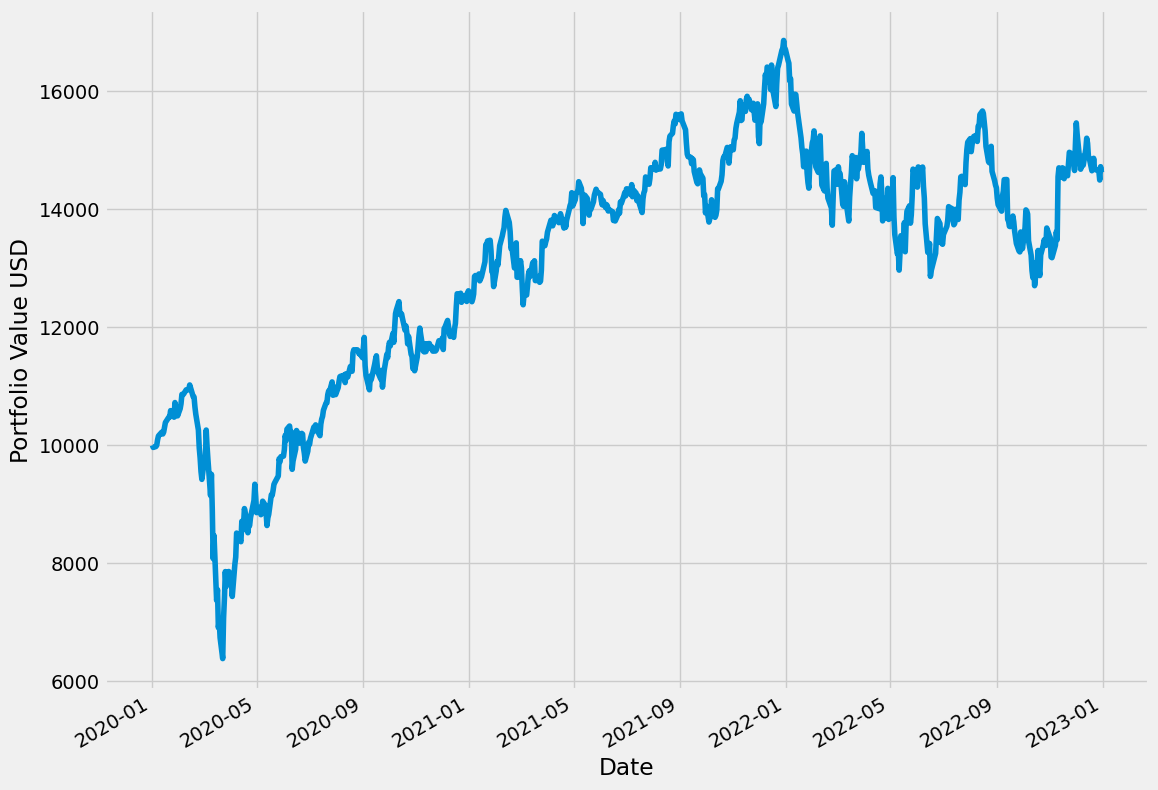

In [6]:
#combining the stats into one dataframe 

stocks_list = [TSLA_, VMC_, SNPS_, SJM_]

stocks_stats = pd.concat(stocks_list)
stocks_stats
stocks_stats.drop(['25%', '50%', '75%', 'count'], inplace=True, axis=1)

#graphing the 'Portfolio Value' column 

plt.style.use('fivethirtyeight')
df['Portfolio Value'].plot(figsize=(12,10))
plt.ylabel('Portfolio Value USD')

Text(0, 0.5, 'Stock Value USD')

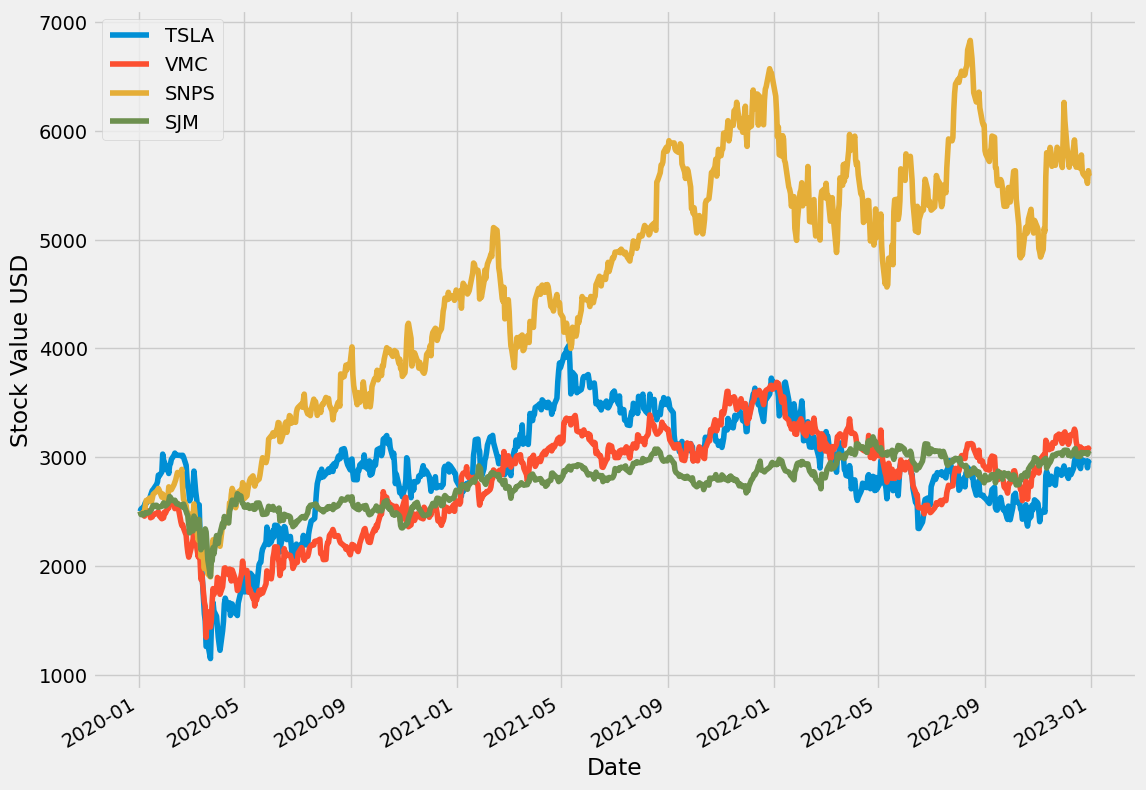

In [7]:
#graphing the individual stocks 

plt.style.use('fivethirtyeight')
df[['TSLA', 'VMC', 'SNPS', 'SJM']].plot(figsize=(12,10))
plt.ylabel('Stock Value USD')

In [8]:
#Results without TSLA (similar steps as above) 

without_TSLA =  ['VMC', 'SNPS', 'SJM']
names = ['VMC', 'SNPS', 'SJM']

frames = []
for i in without_TSLA:
  frame = yf.download(i, start = '2020-01-01', end = '2022-12-31')['Close'].to_frame()
  frames.append(frame)

for i in range(len(frames)):
    frame = frames[i]
    frame = frame.rename(columns={frame.columns[0]: names[i]})
    frames[i] = frame

df2 = pd.concat(frames, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
first_values = df2.iloc[0]
df2 = df2.apply(lambda col: col / first_values[col.name])
df2.head()

df2.iloc[:, :2] = df2.iloc[:, :2].multiply(0.33)

df2['SJM'] = df2['SJM'].multiply(0.34)

df2 = df2 * investment

df2['Portfolio Value'] = df2.sum(axis=1)

stats_noTSLA = df2['Portfolio Value'].describe().to_frame().T
stats_noTSLA.drop(['25%', '50%', '75%', 'count'], inplace=True, axis=1)
stats_noTSLA['median'] = df2['Portfolio Value'].median()
round(stats_noTSLA)

,mean,std,min,max,median
Portfolio Value,13929.0,2422.0,7591.0,17955.0,14605.0
